In [52]:
import numpy as np  # linear algebra
import pandas as pd  # data processing
from sklearn.tree import DecisionTreeRegressor  # model
from matplotlib import pyplot as plt  # visualization
from sklearn.tree import plot_tree  # visualize tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [53]:
df = pd.read_csv('/content/sample_data/cwurData.csv')
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [54]:
df = df.drop(columns=['world_rank','institution','country'])
print(df.dtypes)

national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object


In [55]:
mean = df['broad_impact'].sum()/2000.0

for (col,data) in df.iteritems():
  df[col] = pd.to_numeric(df[col],errors='coerce')
  df = df.replace(np.nan,mean,regex=True)



In [56]:
df1 = df.loc[df.index.isin([i for i in range(1000)])]
df1

,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,7,9,1,1,1,1,496.6995,5,100.00,2012
1,2,9,17,3,12,4,4,496.6995,1,91.67,2012
2,3,17,11,5,4,2,2,496.6995,15,89.50,2012
3,1,10,24,4,16,16,11,496.6995,50,86.17,2012
4,4,2,29,7,37,22,22,496.6995,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...
995,216,323,478,210,779,768,406,724.0000,481,44.53,2014
996,3,355,478,210,704,452,800,724.0000,426,44.53,2014
997,12,355,478,210,475,680,800,739.0000,737,44.53,2014
998,49,355,478,210,753,665,609,703.0000,637,44.53,2014


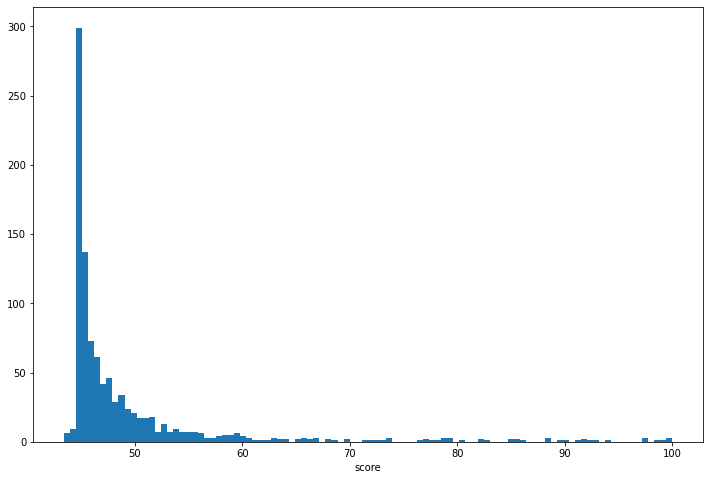

In [57]:
score = df1['score']
plt.figure(figsize=(12, 8))
plt.hist(score,100)
plt.xlabel("score")
plt.show()

In [58]:
model = DecisionTreeRegressor(
    criterion='squared_error',
    splitter='best',
    max_depth = 5
)

# CART algorithm that builds the tree based on our data
model.fit(
    X=df1.drop(columns=['score']), 
    y=df1['score']
)

DecisionTreeRegressor(max_depth=5)

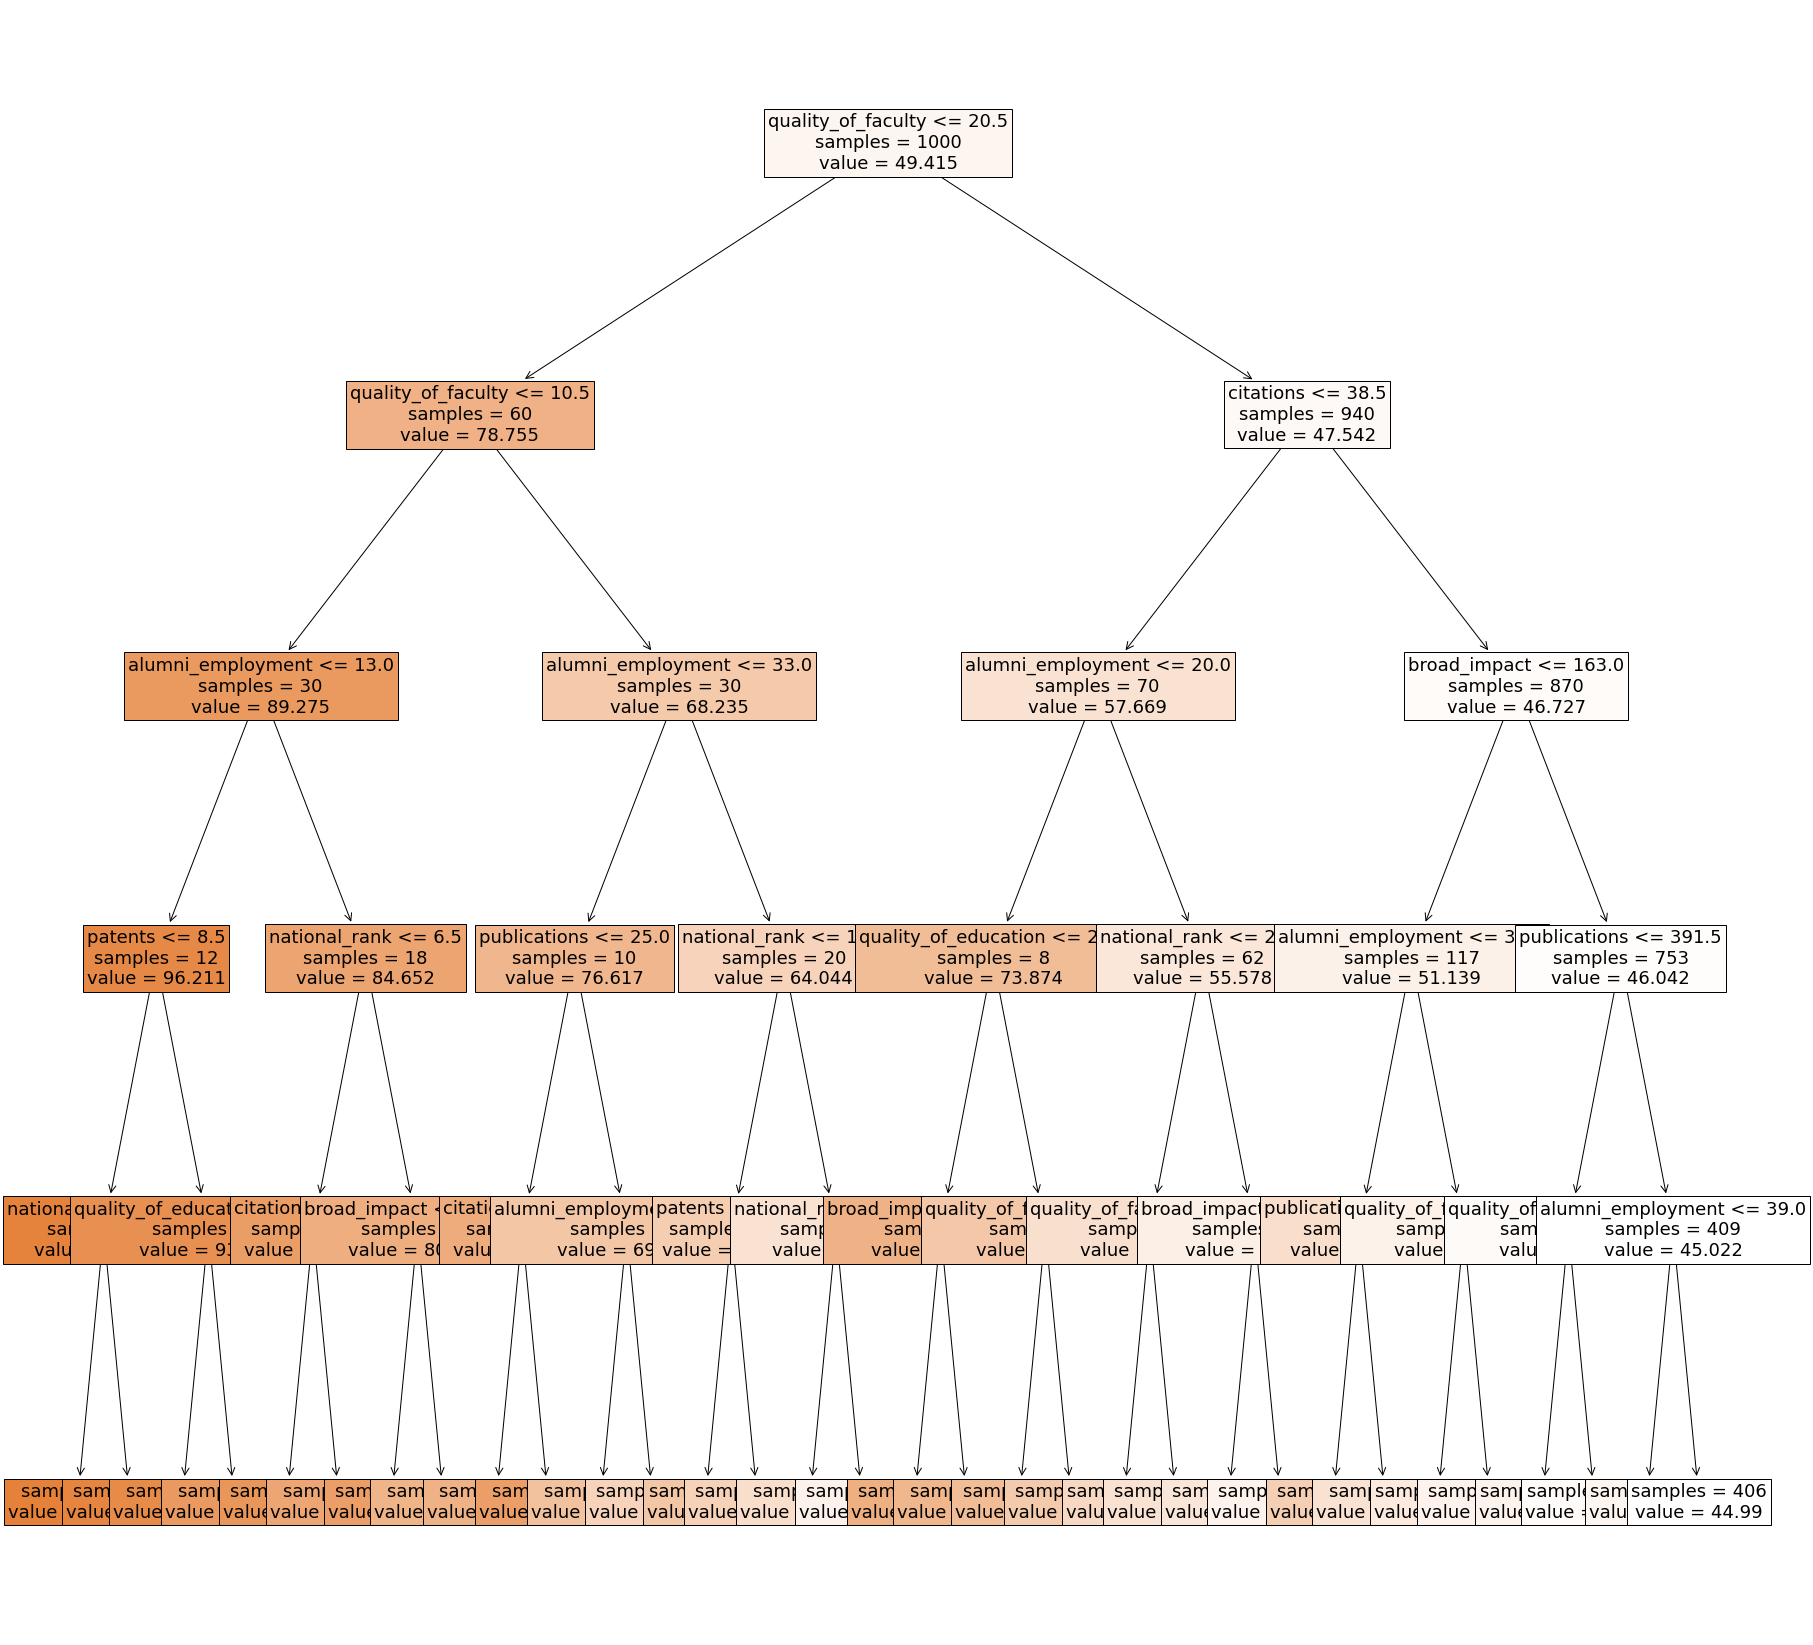

In [59]:
plt.figure(figsize=(30, 30))
plot_tree(
    model,
    feature_names=['national_rank','quality_of_education','alumni_employment','quality_of_faculty','publications','influence','citations','broad_impact','patents','year'],
    impurity=False,
    filled=True,
    fontsize=18
)
plt.show()

In [60]:
df_test = df.loc[df.index.isin([i for i in range(1000,1600)])]
df_test

,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
1000,27,355,240,210,987,920,800,948.0,737,44.53,2014
1001,1,310,473,176,701,729,609,843.0,737,44.52,2014
1002,30,355,478,210,547,745,493,756.0,426,44.52,2014
1003,4,355,478,210,771,559,609,724.0,481,44.52,2014
1004,13,355,478,210,542,888,493,749.0,552,44.52,2014
...,...,...,...,...,...,...,...,...,...,...,...
1595,15,57,567,218,363,492,428,480.0,755,45.17,2015
1596,20,103,181,191,358,510,428,503.0,292,45.17,2015
1597,10,367,564,218,339,516,428,529.0,104,45.17,2015
1598,136,367,567,218,463,399,368,344.0,253,45.16,2015


#Regression metrics:
___________________________________________________
#mean_squared_error :
The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.
___________________________________________________
#R² score :
the coefficient of determination The r2_score function computes the coefficient of determination, usually denoted as R².

It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

As such variance is dataset dependent,R² may not be meaningfully comparable across different datasets. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected (average) value of y, disregarding the input features, would get an R² score of 0.0.

In [61]:
y_true,y_pred = [],[]
for i in df_test.index:
  inputs = pd.DataFrame([{"national_rank":df_test["national_rank"][i] , "quality_of_education": df_test["quality_of_education"][i],"alumni_employment":df_test["alumni_employment"][i],"quality_of_faculty":df_test["quality_of_faculty"][i],"publications":df_test["publications"][i],"influence":df_test["influence"][i],"citations":df_test["citations"][i],"broad_impact":df_test["broad_impact"][i],"patents":df_test["patents"][i],"year": df_test["year"][i]}])
  '''
  use the predict method to derive the SalePrice
  y_pred - A list of the values ​​that the model predicted 
  y_true - A list of the actual values

  '''
  prediction = model.predict(inputs)
  y_pred.append(prediction)
  y_true.append(df_test['score'][i])
  # print(f"Predicted SalePrice: {prediction} , Real SalePrice: {df_test['SalePrice'][i]}")

'''
Calculation of MSE and R2
'''
#MSE
mse = mean_squared_error(y_true, y_pred,squared=False)
print(f"mean_squared_error(y_true, y_pred): {mse}")
#R2
r2 = r2_score(y_true, y_pred)
print(f"r2_score(y_true, y_pred): {r2}")
# r2_score(y_true, y_pred, multioutput='uniform_average')

mean_squared_error(y_true, y_pred): 1.816653844715218
r2_score(y_true, y_pred): 0.948447668880695


In [62]:
from tabulate import tabulate
print(tabulate([[mse,r2]], headers=["MSE","R2"], tablefmt="grid"))

+---------+----------+
|     MSE |       R2 |
+=========+==========+
| 1.81665 | 0.948448 |
+---------+----------+


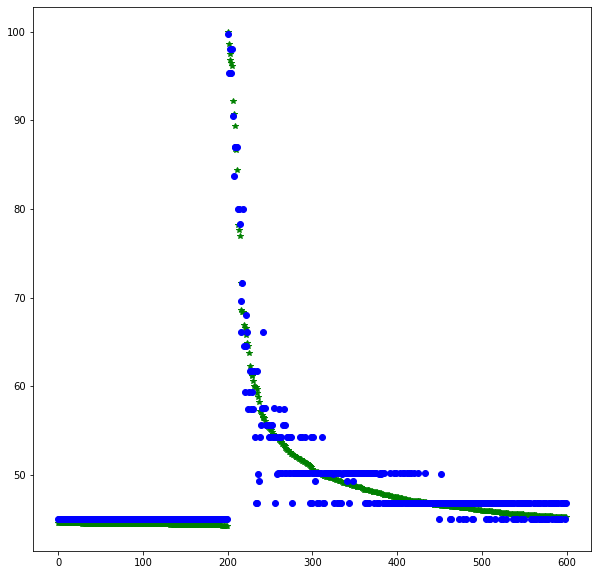

In [63]:
plt.figure(figsize=(10, 10))
plt.plot(y_true,'g*', y_pred, 'bo')
plt.show()